##### Importing Relevant Libraries

In [22]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

##### Initilizing data

In [36]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)

x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(-1, 1))

##### Defining scatter plot function

In [38]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])

##### Plotting Data

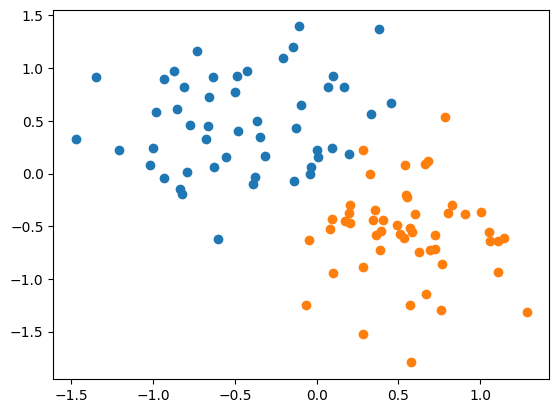

In [40]:
scatter_plot()

##### Model Blueprint

In [25]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred
    
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

##### Instantiating the model

In [43]:
torch.manual_seed(2)
model = Model(2, 1)
print(model)
print(list(model.parameters()))
print(model.linear.weight)
print(model.linear.bias)

Model(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]
Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True)
Parameter containing:
tensor([0.1939], requires_grad=True)


##### Extracting Model Parameters

In [27]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
b1 = b[0]
def get_params():
    return (w1.item(), w2.item(), b1.item())

##### Defining plot_fit function

In [28]:
def plot_fit(title):
    plt.title = title
    w1, w2, b1 = get_params()
    x1 = np.array([-2.0, 2.0])
    x2 = (w1*x1 + b1)/-w2 # 0 = w1*x1 + w2*x2 + b1
    plt.plot(x1, x2, 'r')
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])
    plt.show()

##### Plotting Initial Model

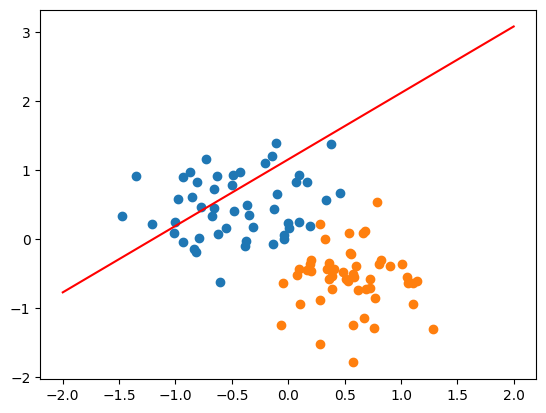

In [29]:
plot_fit('Initial Model')

##### Binary Cross Entropy Loss and Optimizer Declaration

In [30]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

#####  Training Model

In [31]:
epochs = 1000
losses = []

for i in range(epochs):
    y_pred = model.forward(torch.Tensor(X))
    loss = criterion(y_pred, torch.Tensor(y).view(-1, 1))
    print("epoch:", i, "loss:", loss.item())
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0 loss: 0.6185115575790405
epoch: 1 loss: 0.5708222985267639
epoch: 2 loss: 0.5285906195640564
epoch: 3 loss: 0.4912733733654022
epoch: 4 loss: 0.4577789008617401
epoch: 5 loss: 0.427044153213501
epoch: 6 loss: 0.39862915873527527
epoch: 7 loss: 0.3725408613681793
epoch: 8 loss: 0.34886229038238525
epoch: 9 loss: 0.3275769352912903
epoch: 10 loss: 0.3085334897041321
epoch: 11 loss: 0.2914774417877197
epoch: 12 loss: 0.276114821434021
epoch: 13 loss: 0.2621767520904541
epoch: 14 loss: 0.24945762753486633
epoch: 15 loss: 0.23781701922416687
epoch: 16 loss: 0.227161705493927
epoch: 17 loss: 0.2174224704504013
epoch: 18 loss: 0.20853683352470398
epoch: 19 loss: 0.20043905079364777
epoch: 20 loss: 0.19305680692195892
epoch: 21 loss: 0.18631303310394287
epoch: 22 loss: 0.18013067543506622
epoch: 23 loss: 0.1744379997253418
epoch: 24 loss: 0.1691729724407196
epoch: 25 loss: 0.1642853170633316
epoch: 26 loss: 0.15973617136478424
epoch: 27 loss: 0.15549609065055847
epoch: 28 loss: 0.1515

##### Plotting Losses

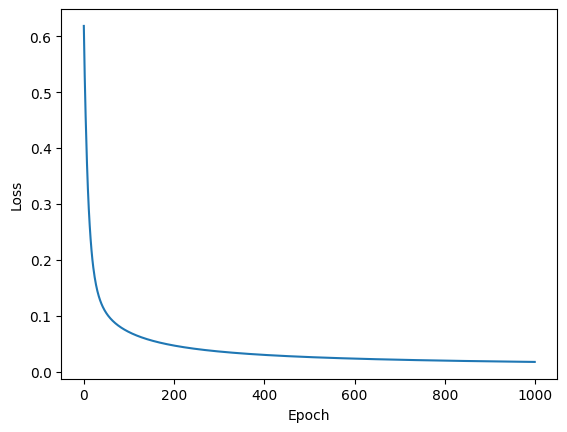

In [32]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#####  Plotting Trained Model

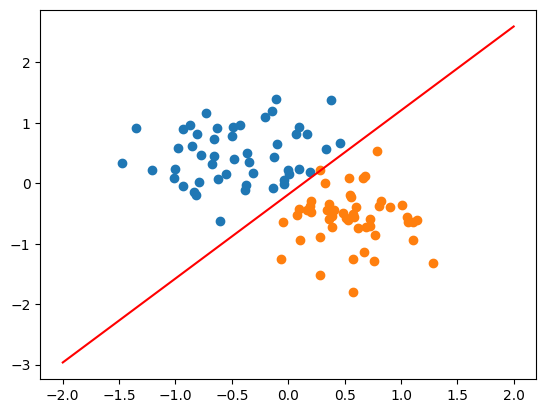

In [33]:
plot_fit('Trained Model')

##### Making Predictions

Red point positive prediction score: 1.0
Black point positive prediction score: 3.3850591600603774e-12
Red point class: 1
Black point class: 0


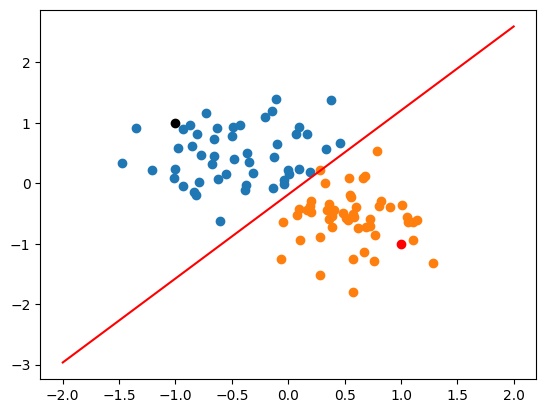

In [34]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro', label='y=0')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko', label='y=1')
print("Red point positive prediction score:", model.forward(point1).item())
print("Black point positive prediction score:", model.forward(point2).item())
print("Red point class:", model.predict(point1))
print("Black point class:", model.predict(point2))
plot_fit('Trained Model')